<a href="https://colab.research.google.com/github/meetAmarAtGithub/15_Reva_Speech_Analytics/blob/main/Day4_Leg_2_Audio_segmentation_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics"

/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics


In [ ]:
#Load the data
path = "/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis"

In [ ]:
!pip install pyAudioAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264374 sha256=4fdd3d038e8af20b3c69258ee47d31ef56020ce963653e3e518371d38ab77087
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
!pip install eyed3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 18.5 MB/s eta 0:00:00


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the required files
from pyAudioAnalysis import MidTermFeatures as aF
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
dirs = [path+"/classical/", path+"/janapada/"]

In [ ]:
print(dirs)

['/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/', '/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/janapada/']


In [ ]:
class_names = ['classical', 'janapada']

In [ ]:
print(class_names)

['classical', 'janapada']


In [ ]:
#initialize minimu window, minimum step, window size and step size
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05

In [ ]:
# segment-level feature extraction:
features = []

In [ ]:
features = []
for d in dirs: # get feature matrix for each directory (class)
    print(d)
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, s_win, s_step)
    features.append(f)

/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/
Analyzing file 1 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip1.wav
Analyzing file 2 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip12.wav
Analyzing file 3 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip15.wav
Analyzing file 4 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip17.wav
Analyzing file 5 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip19.wav
Analyzing file 6 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/A

In [ ]:
features

[array([[8.00740715e-02, 4.14463284e-02, 3.20947091e+00, ...,
         7.66296102e-03, 1.33333333e+02, 1.08024691e-01],
        [7.54174663e-02, 4.02357478e-02, 3.15959009e+00, ...,
         7.51078840e-03, 1.00000000e+02, 8.76623370e-02],
        [7.45686399e-02, 2.74512732e-02, 3.25717264e+00, ...,
         1.00112213e-02, 1.33333333e+02, 7.71929819e-02],
        ...,
        [1.28900973e-01, 5.90030407e-02, 3.25841310e+00, ...,
         8.89701840e-03, 1.71428571e+02, 1.15089513e-01],
        [9.92485752e-02, 9.85562238e-02, 3.15156212e+00, ...,
         1.13277593e-02, 1.50000000e+02, 1.13300492e-01],
        [7.76132709e-02, 7.35339682e-02, 3.14672609e+00, ...,
         1.35675239e-02, 2.40000000e+02, 1.09452736e-01]]),
 array([[1.53786148e-01, 2.22325749e-02, 3.15236629e+00, ...,
         1.35185571e-02, 1.50000000e+02, 1.10192837e-01],
        [1.48264963e-01, 3.25877830e-02, 3.14880308e+00, ...,
         1.31307246e-02, 1.50000000e+02, 1.09452736e-01],
        [1.27794065e-01, 

In [ ]:
print(features[0].shape, features[1].shape)

(12, 138) (12, 138)


In [ ]:
# select 2 features and create feature matrices for the two classes:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('energy_entropy_mean')]])

In [ ]:
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('energy_entropy_mean')]])

In [ ]:
# select 2 features and create feature matrices for the two classes:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('energy_entropy_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('energy_entropy_mean')]])

In [ ]:
#Prepare the data
y = np.concatenate((np.zeros(f1.shape[1]), np.ones(f2.shape[1])))
f = np.concatenate((f1.T, f2.T), axis = 0)

In [ ]:
#We need to scale the features
f_s = f/f.max()

In [ ]:
#Create a data frame
df = pd.DataFrame(f, columns = ['scm', 'eem'])
df['label'] = y
df['label'] = df['label'].astype(int)

In [ ]:
df.head()

,scm,eem,label
0,0.149426,3.209471,0
1,0.140915,3.159590,0
2,0.163044,3.257173,0
3,0.118440,3.094551,0
4,0.172501,3.183388,0


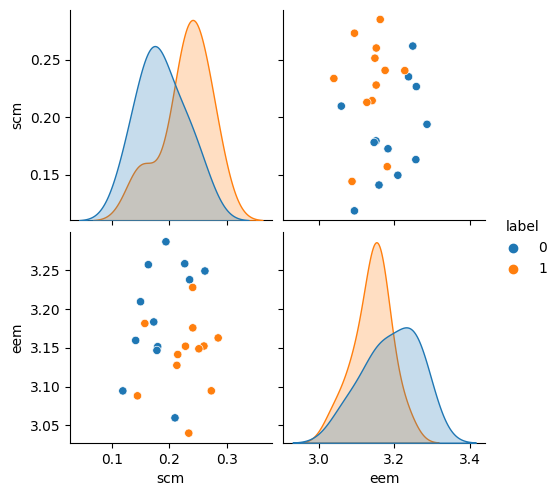

In [ ]:
#Visualize the songs
sns.pairplot(df, hue = 'label')

In [ ]:
#Lets build the kmeans clusters
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df[['scm', 'eem']])

In [ ]:
df['predicted'] = y_km

In [ ]:
df.head()

,scm,eem,label,predicted
0,0.149426,3.209471,0,1
1,0.140915,3.159590,0,0
2,0.163044,3.257173,0,1
3,0.118440,3.094551,0,0
4,0.172501,3.183388,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.label, df.predicted)

array([[ 6,  6],
       [11,  1]])

In [ ]:
print(fn)

['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta mfcc_7_mean', 'delta mfcc_8_mean', 'delta mfcc_9_

In [ ]:
# train the svm classifier
cl = SVC(kernel='rbf', C=20)
cl.fit(df[['scm', 'eem']], y)

SVC(C=20)

In [ ]:
y_pred = cl.predict(f)
confusion_matrix(y, y_pred)

/usr/local/lib/python3.10/dist-packages/pyAudioAnalysis/../sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[11,  1],
       [ 2, 10]])